In [1]:
# --- Step 1: Import required libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# --- Step 2: Load dataset ---
df = pd.read_csv("data/birth_sex_ethnic_state.csv", parse_dates=['date'])

# --- Step 3: Basic overview ---
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Preview first few rows
df.head()


Shape: (7854, 5)

Data Types:
 state                object
date         datetime64[ns]
sex                  object
ethnicity            object
abs                 float64
dtype: object

Missing values:
 state         0
date          0
sex           0
ethnicity     0
abs          64
dtype: int64

Duplicate rows: 0


,state,date,sex,ethnicity,abs
0,Johor,2000-01-01,both,overall,67183.0
1,Johor,2001-01-01,both,overall,61432.0
2,Johor,2002-01-01,both,overall,59699.0
3,Johor,2003-01-01,both,overall,58230.0
4,Johor,2004-01-01,both,overall,57339.0


In [3]:
# --- Check unique values for categorical columns ---
print("Unique States:", df['state'].nunique())
print("Unique Sex categories:", df['sex'].nunique())
print("Unique Ethnicities:", df['ethnicity'].nunique())

# --- Summary of numeric target variable ---
print("\nSummary of 'abs' (Number of Births):")
print(df['abs'].describe())

# --- Extract the year for temporal analysis ---
df['year'] = df['date'].dt.year
print(f"\nData covers {df['year'].min()} to {df['year'].max()}")

# --- Quick overview of missing target values ---
print(f"Missing values in target 'abs': {df['abs'].isna().sum()}")


Unique States: 16
Unique Sex categories: 3
Unique Ethnicities: 7

Summary of 'abs' (Number of Births):
count      7790.000000
mean       6054.008472
std       11434.591803
min           0.000000
25%         145.000000
50%         999.000000
75%        6671.750000
max      108932.000000
Name: abs, dtype: float64

Data covers 2000 to 2023
Missing values in target 'abs': 64


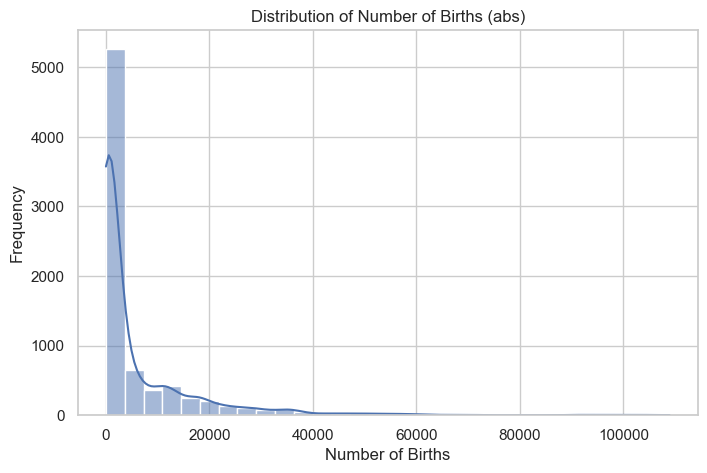

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['abs'], bins=30, kde=True)
plt.title("Distribution of Number of Births (abs)")
plt.xlabel("Number of Births")
plt.ylabel("Frequency")
plt.show()


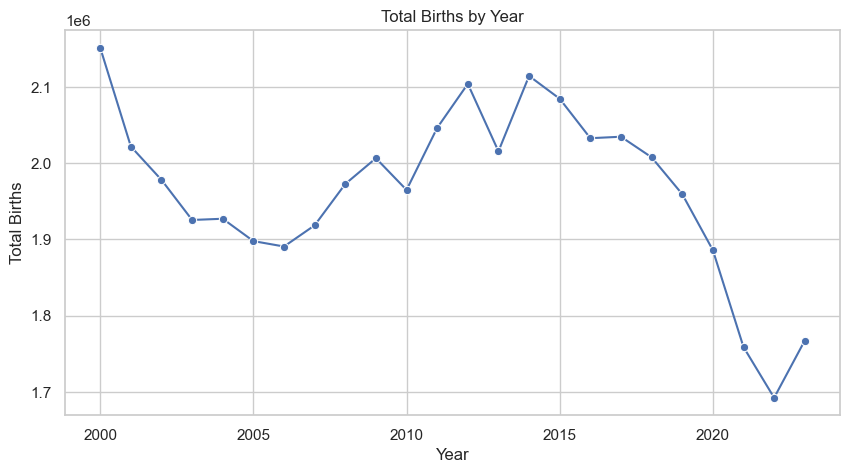

In [7]:
plt.figure(figsize=(10,5))
yearly_births = df.groupby('year')['abs'].sum().reset_index()
sns.lineplot(data=yearly_births, x='year', y='abs', marker='o')
plt.title("Total Births by Year")
plt.xlabel("Year")
plt.ylabel("Total Births")
plt.show()


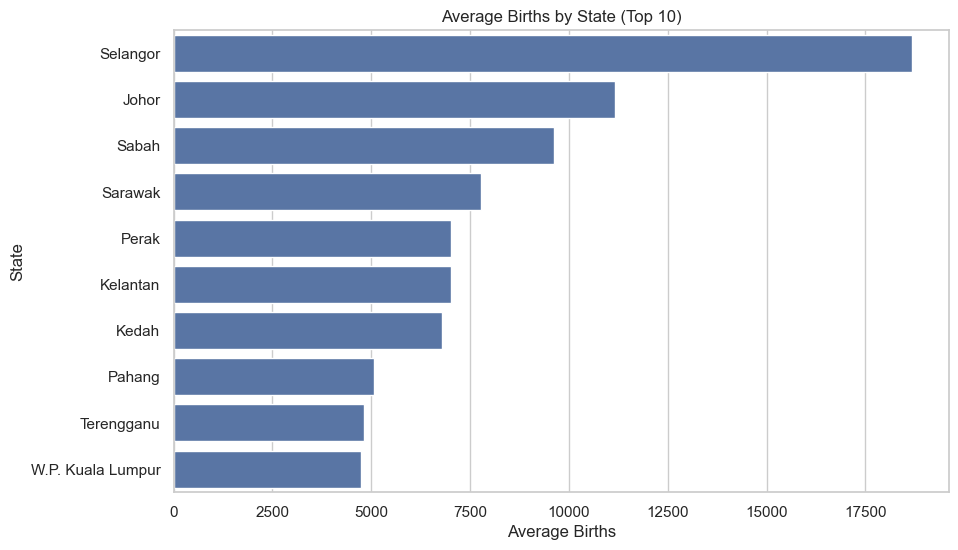

In [9]:
plt.figure(figsize=(10,6))
state_avg = df.groupby('state')['abs'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=state_avg.values, y=state_avg.index)
plt.title("Average Births by State (Top 10)")
plt.xlabel("Average Births")
plt.ylabel("State")
plt.show()


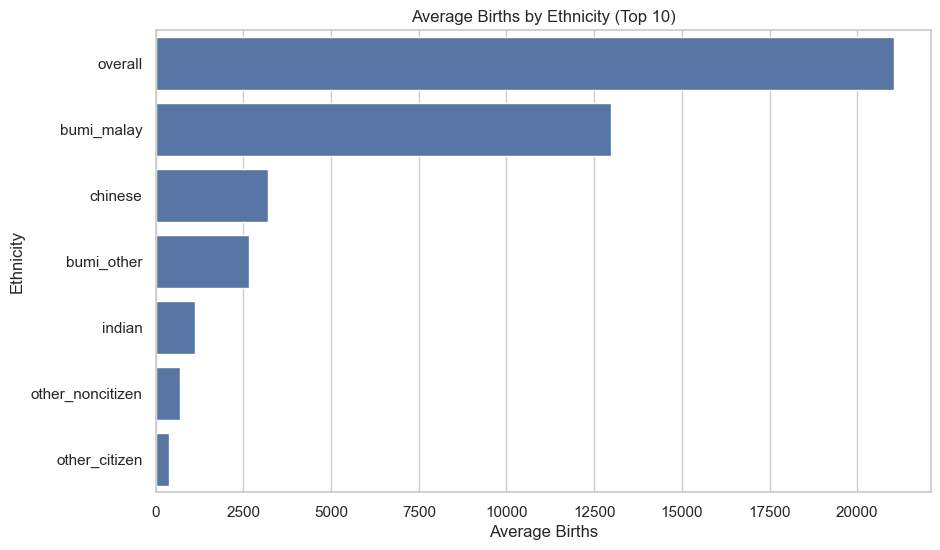

In [11]:
plt.figure(figsize=(10,6))
eth_avg = df.groupby('ethnicity')['abs'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=eth_avg.values, y=eth_avg.index)
plt.title("Average Births by Ethnicity (Top 10)")
plt.xlabel("Average Births")
plt.ylabel("Ethnicity")
plt.show()


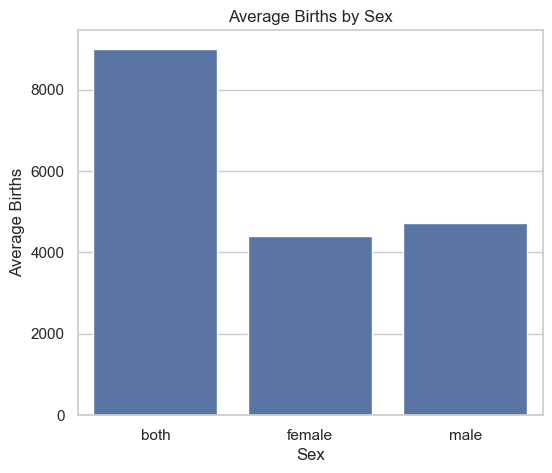

In [13]:
plt.figure(figsize=(6,5))
sns.barplot(data=df.groupby('sex')['abs'].mean().reset_index(), x='sex', y='abs')
plt.title("Average Births by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Births")
plt.show()


In [15]:
# Data cleaning
#Drop rows where target 'abs' is missing
print("Missing 'abs' values before cleaning:", df['abs'].isna().sum())
df = df.dropna(subset=['abs'])

# Remove duplicates (if any)
df = df.drop_duplicates()
print("Dataset shape after cleaning:", df.shape)


Missing 'abs' values before cleaning: 64
Dataset shape after cleaning: (7790, 6)


In [17]:
#Detecting outlier
Q1 = df['abs'].quantile(0.25)
Q3 = df['abs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['abs'] < lower_bound) | (df['abs'] > upper_bound)]
print(f"Outliers detected: {outliers.shape[0]}")

# Remove outliers
df = df[(df['abs'] >= lower_bound) & (df['abs'] <= upper_bound)]
print("Dataset shape after outlier removal:", df.shape)


Outliers detected: 986
Dataset shape after outlier removal: (6804, 6)


In [19]:
#Encoding
# Select feature columns and target
features = ['state', 'sex', 'ethnicity', 'year']
target = 'abs'

X = df[features]
y = df[target]

# --- One-Hot Encoding ---
X_encoded = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X_encoded.shape)
print("Encoded features preview:")
X_encoded.head()


Shape after encoding: (6804, 24)
Encoded features preview:


,year,state_Kedah,state_Kelantan,state_Melaka,state_Negeri Sembilan,state_Pahang,state_Perak,state_Perlis,state_Pulau Pinang,state_Sabah,state_Sarawak,state_Selangor,state_Terengganu,state_W.P. Kuala Lumpur,state_W.P. Labuan,state_W.P. Putrajaya,sex_female,sex_male,ethnicity_bumi_other,ethnicity_chinese,ethnicity_indian,ethnicity_other_citizen,ethnicity_other_noncitizen,ethnicity_overall
72,2000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
73,2001,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
74,2002,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
75,2003,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
76,2004,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [21]:
# Combine encoded features and target for later modeling
final_df = pd.concat([X_encoded, y.reset_index(drop=True)], axis=1)

# Save to CSV
final_df.to_csv("clean_birth_regression.csv", index=False)

print(" Cleaned and encoded dataset saved as 'clean_birth_regression.csv'")
print("Final shape:", final_df.shape)


 Cleaned and encoded dataset saved as 'clean_birth_regression.csv'
Final shape: (7822, 25)


In [23]:
# ============================================================
# FINAL CLEANING PIPELINE FOR ML MODELING
# ============================================================

import pandas as pd

# --- Load cleaned file ---
df = pd.read_csv("clean_birth_regression.csv")

print("Before cleaning:")
print("Shape:", df.shape)
print("Missing values:", df.isna().sum().sum())
print("Duplicates:", df.duplicated().sum())

# ============================================================
# 1. Remove duplicates
# ============================================================
df = df.drop_duplicates()
print("\n✅ Duplicates removed. Current shape:", df.shape)

# ============================================================
# 2. Handle missing values
# ============================================================
# Replace missing encoded (feature) values with 0
df = df.fillna(0)

# Drop rows where target 'abs' is missing
if 'abs' in df.columns:
    before_drop = df.shape[0]
    df = df.dropna(subset=['abs'])
    print(f"✅ Dropped {before_drop - df.shape[0]} rows with missing target values.")

# ============================================================
# 3. Ensure all columns are numeric
# ============================================================
# Convert all to numeric, coercing any errors to NaN, then fill with 0
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# ============================================================
# 4. Final Verification
# ============================================================
print("\n--- Final Verification ---")
print("Shape:", df.shape)
print("Missing values:", df.isna().sum().sum())
print("Duplicates:", df.duplicated().sum())
print("All columns numeric:", df.dtypes.apply(lambda x: x in ['int64', 'float64']).all())
print("Target 'abs' summary:")
print(df['abs'].describe())

# ============================================================
# 5. Save the final ready-to-train dataset
# ============================================================
output_path = "final_birth_regression.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Final dataset saved as: {output_path}")


Before cleaning:
Shape: (7822, 25)
Missing values: 25450
Duplicates: 89

✅ Duplicates removed. Current shape: (7733, 25)
✅ Dropped 0 rows with missing target values.

--- Final Verification ---
Shape: (7733, 25)
Missing values: 0
Duplicates: 0
All columns numeric: True
Target 'abs' summary:
count     7733.000000
mean      2200.006078
std       3732.982093
min          0.000000
25%         51.000000
50%        357.000000
75%       2144.000000
max      16451.000000
Name: abs, dtype: float64

✅ Final dataset saved as: final_birth_regression.csv


Shape: (7733, 25)
Training samples: 6186
Testing samples: 1547

📈 Linear Regression Performance:
MAE:  1822.992655
RMSE: 2826.499680
R²:   0.420231


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



 Random Forest Regressor Performance:
MAE:  791.556519
RMSE: 1903.286034
R²:   0.737115

--- Model Comparison (Raw Values) ---


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,MAE,RMSE,R²
0,Linear Regression,1822.992655,2826.499680,0.420231
1,Random Forest,791.556519,1903.286034,0.737115


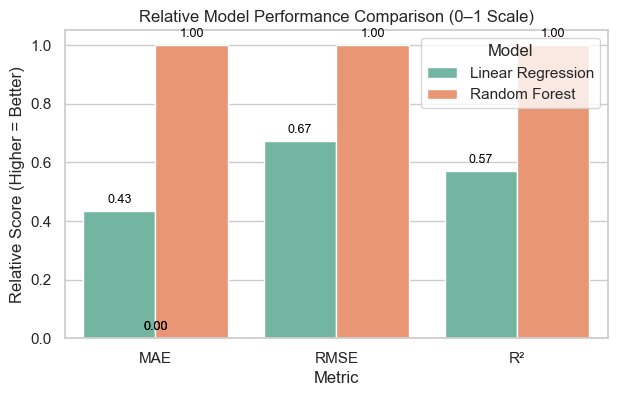


✅ The better performing model based on R² is: Random Forest


In [45]:
# ============================================================
# TASK 1 – TRADITIONAL MACHINE LEARNING MODELS
# Models: Linear Regression & Random Forest Regressor
# ============================================================

# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid", palette="Set2")

# ============================================================
# STEP 2: LOAD THE FINAL CLEAN DATASET
# ============================================================

df = pd.read_csv("final_birth_regression.csv")
print("Shape:", df.shape)
df.head()

# ============================================================
# STEP 3: SPLIT FEATURES AND TARGET
# ============================================================

X = df.drop(columns=['abs'])
y = df['abs']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# ============================================================
# STEP 4: SCALE FEATURES (for Linear Regression)
# ============================================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================
# STEP 5: TRAIN LINEAR REGRESSION MODEL
# ============================================================

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation metrics
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)

print("\n📈 Linear Regression Performance:")
print(f"MAE:  {lr_mae:.6f}")
print(f"RMSE: {lr_rmse:.6f}")
print(f"R²:   {lr_r2:.6f}")

# ============================================================
# STEP 6: TRAIN RANDOM FOREST REGRESSOR
# ============================================================

rf = RandomForestRegressor(
    n_estimators=200, 
    random_state=42,
    max_depth=None,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\n🌳 Random Forest Regressor Performance:")
print(f"MAE:  {rf_mae:.6f}")
print(f"RMSE: {rf_rmse:.6f}")
print(f"R²:   {rf_r2:.6f}")

# ============================================================
# STEP 7: COMPARE PERFORMANCE (RAW METRICS)
# ============================================================

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [lr_mae, rf_mae],
    'RMSE': [lr_rmse, rf_rmse],
    'R²': [lr_r2, rf_r2]
})

print("\n--- Model Comparison (Raw Values) ---")
display(results)

# ============================================================
# STEP 8: NORMALIZE METRICS FOR VISUAL COMPARISON
# ============================================================

normalized_results = results.copy()

# Use MinMaxScaler to scale metrics between 0 and 1
scaler = MinMaxScaler()

for col in ['MAE', 'RMSE', 'R²']:
    # For error metrics, smaller is better → invert them before scaling
    if col in ['MAE', 'RMSE']:
        normalized_results[col] = 1 - scaler.fit_transform(results[[col]])
    else:
        normalized_results[col] = scaler.fit_transform(results[[col]])

# Melt for plotting
plot_data = normalized_results.melt(
    id_vars='Model', var_name='Metric', value_name='Normalized Score'
)

# ============================================================
# STEP 9: VISUALIZE NORMALIZED COMPARISON
# ============================================================

plt.figure(figsize=(7,4))
sns.barplot(
    data=plot_data,
    x='Metric',
    y='Normalized Score',
    hue='Model'
)
plt.title("Normalized Model Performance Comparison (0–1 Scale)")
plt.ylabel("Normalized Score (Higher = Better)")
plt.ylim(0, 1.05)
plt.legend(title="Model", loc='upper right')
plt.show()

# ============================================================
# STEP 10: IDENTIFY BEST MODEL
# ============================================================

best_model = 'Random Forest' if rf_r2 > lr_r2 else 'Linear Regression'
print(f"\n✅ The better performing model based on R² is: {best_model}")


Dataset shape: (7733, 25)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



🌳 Final Random Forest Performance:
MAE:  791.604
RMSE: 1906.281
R²:   0.736


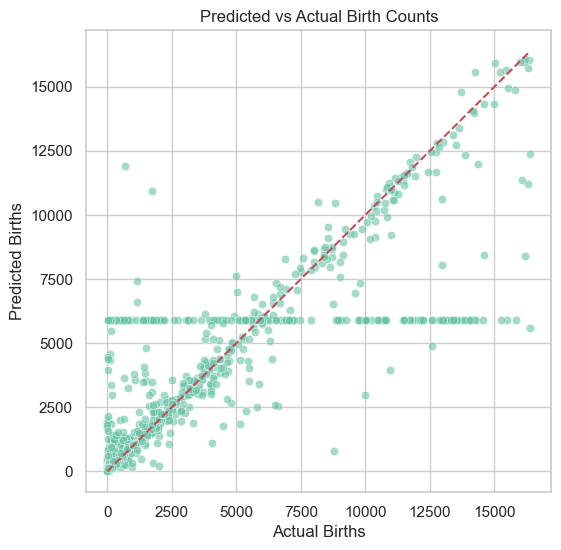

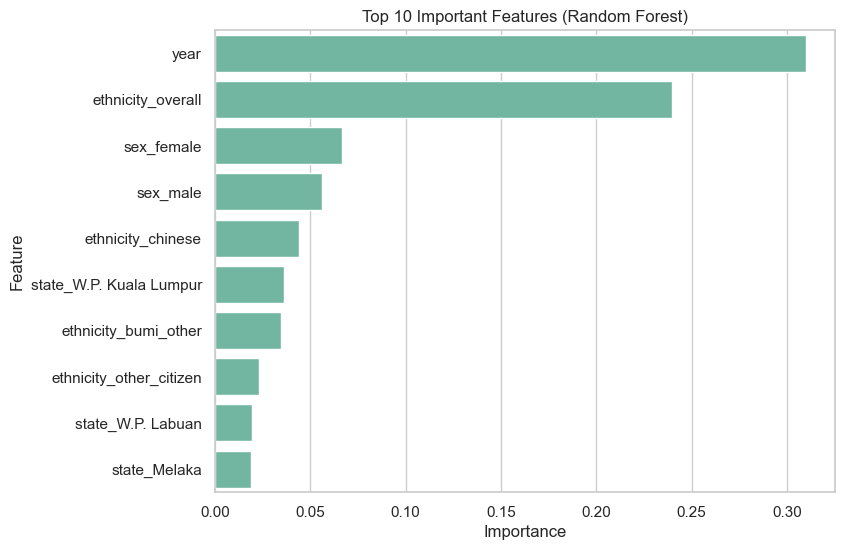


Top 10 Most Important Features:


,Feature,Importance
0,year,0.309770
23,ethnicity_overall,0.239490
16,sex_female,0.066521
17,sex_male,0.056087
19,ethnicity_chinese,0.044227
13,state_W.P. Kuala Lumpur,0.036208
18,ethnicity_bumi_other,0.034634
21,ethnicity_other_citizen,0.023201
14,state_W.P. Labuan,0.019115
3,state_Melaka,0.018691



Cross-Validation R² scores: [ -0.55699817  -1.01359576 -20.82112168 -10.06119848  -0.36524393]
Average CV R²: -6.564

✅ Model saved as 'random_forest_birth_model.pkl'


In [33]:
# ============================================================
# TASK 1 – FINAL TRADITIONAL MODEL: RANDOM FOREST REGRESSOR
# ============================================================

# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Plot style
sns.set(style="whitegrid", palette="Set2")

# ============================================================
# STEP 2: LOAD FINAL DATA
# ============================================================

df = pd.read_csv("final_birth_regression.csv")
print("Dataset shape:", df.shape)
df.head()

# ============================================================
# STEP 3: SPLIT FEATURES AND TARGET
# ============================================================

X = df.drop(columns=['abs'])
y = df['abs']

# 80% Train / 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================================
# STEP 4: TRAIN FINAL RANDOM FOREST MODEL
# ============================================================

rf = RandomForestRegressor(
    n_estimators=300,      # a bit higher for stability
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ============================================================
# STEP 5: EVALUATE MODEL PERFORMANCE
# ============================================================

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\n🌳 Final Random Forest Performance:")
print(f"MAE:  {rf_mae:.3f}")
print(f"RMSE: {rf_rmse:.3f}")
print(f"R²:   {rf_r2:.3f}")

# ============================================================
# STEP 6: VISUALIZE PREDICTED VS ACTUAL
# ============================================================

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual Birth Counts")
plt.xlabel("Actual Births")
plt.ylabel("Predicted Births")
plt.show()

# ============================================================
# STEP 7: FEATURE IMPORTANCE
# ============================================================

# Extract feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=importance.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

print("\nTop 10 Most Important Features:")
display(importance.head(10))

# ============================================================
# STEP 8: CROSS-VALIDATION (OPTIONAL ROBUSTNESS CHECK)
# ============================================================

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("\nCross-Validation R² scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores).round(3))

# ============================================================
# STEP 9: SAVE TRAINED MODEL 
# ============================================================

import joblib
joblib.dump(rf, "random_forest_birth_model.pkl")
print("\n✅ Model saved as 'random_forest_birth_model.pkl'")
